In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set();

pd.set_option('display.max_columns', None)

In [32]:
df = pd.read_csv('datasets/BankChurners.csv')

In [33]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [34]:
df.columns[1:-2]

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [35]:
df = df[df.columns[1:-2]]

In [36]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [37]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

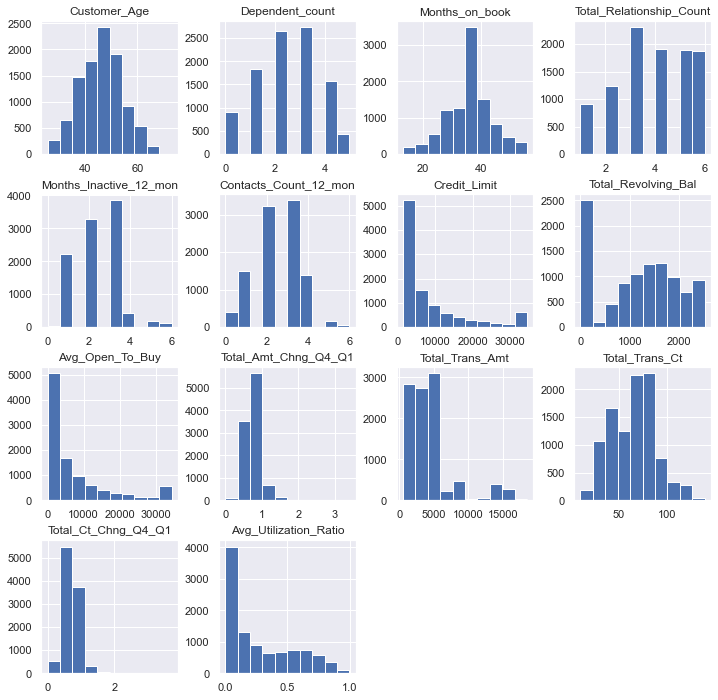

In [39]:
df.hist(figsize=(12,12));

In [40]:
round(df['Months_on_book'].mean())

36

In [41]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [42]:
df['Attrition_Flag_num'] = df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

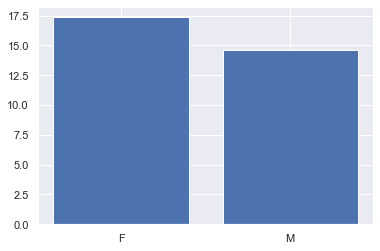

In [44]:
df_g = df.groupby('Gender')['Attrition_Flag_num'].mean()

plt.bar(df_g.index, df_g.values*100);

In [46]:
df['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1], dtype=int64)

In [134]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_num
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


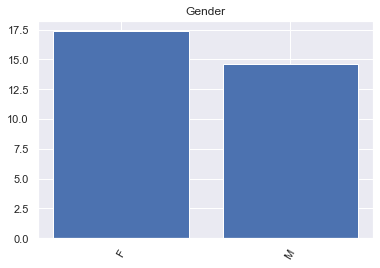

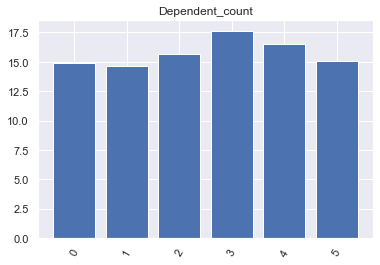

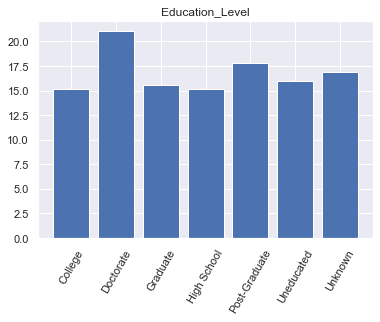

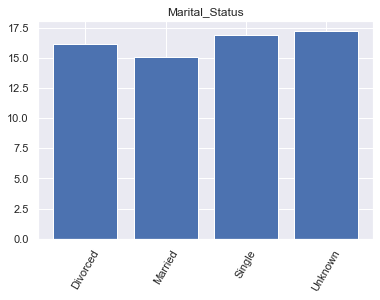

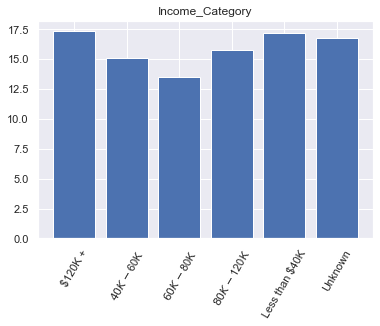

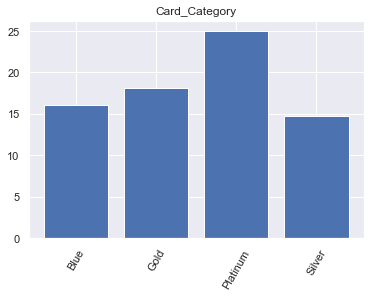

In [49]:
for col in df.columns[2:8]:

    df_g = df.groupby(col)['Attrition_Flag_num'].mean()
    
    plt.bar(df_g.index, df_g.values*100)
    
    plt.title(col)
    plt.xticks(rotation=60)
    plt.show()

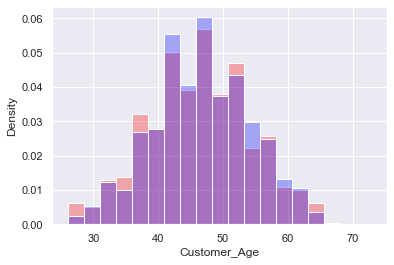

In [51]:
df_0 = df.loc[df['Attrition_Flag_num'] == 0,'Customer_Age']
df_1 = df.loc[df['Attrition_Flag_num'] == 1,'Customer_Age']

#plt.hist(df_0, alpha=0.5, bins=np.linspace(26,73,20))
#plt.hist(df_1, alpha=0.5, bins=np.linspace(26,73,20))

min_ = df['Customer_Age'].min()
max_ = df['Customer_Age'].max()

sns.histplot(df_0,stat='density',bins=np.linspace(min_,max_,20),color='red',alpha=0.3)
sns.histplot(df_1,stat='density',bins=np.linspace(min_,max_,20),color='blue',alpha=0.3)

plt.show()

In [137]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_num
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


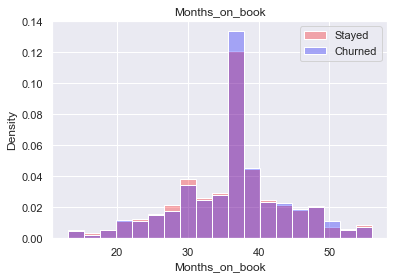

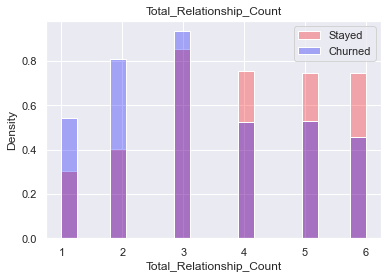

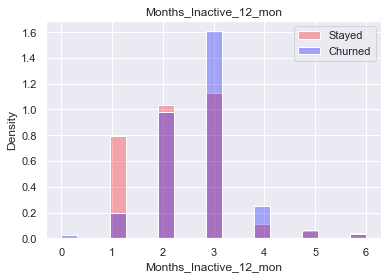

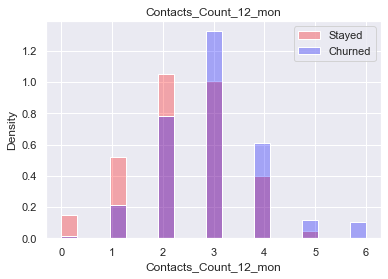

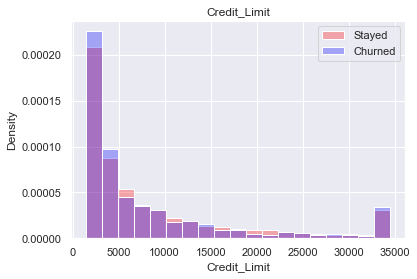

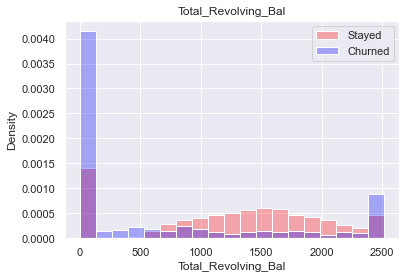

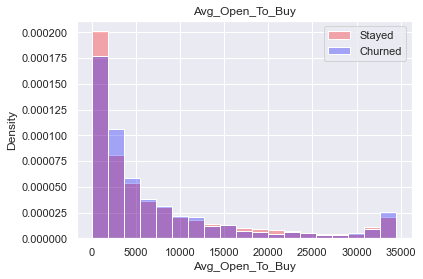

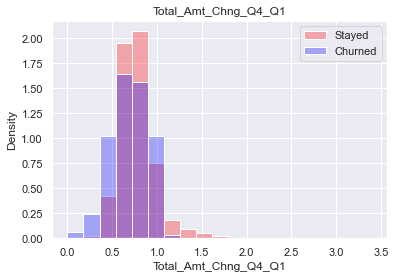

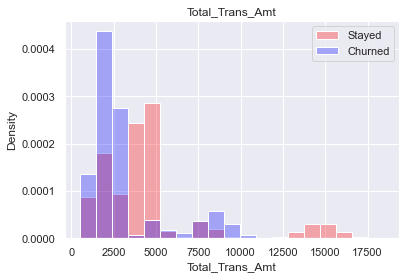

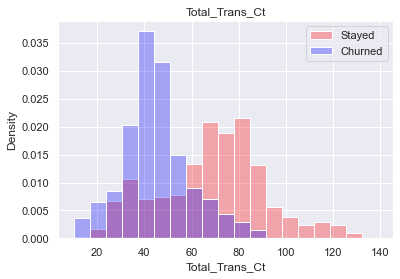

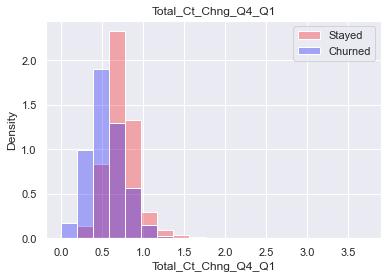

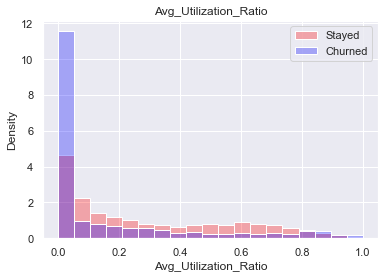

In [52]:
for col in df.columns[8:-1]:
    
    df_0 = df.loc[df['Attrition_Flag_num'] == 0,col] 
    df_1 = df.loc[df['Attrition_Flag_num'] == 1,col]


    min_ = df[col].min()
    max_ = df[col].max()

    sns.histplot(df_0,stat='density',bins=np.linspace(min_,max_,20),color='red',alpha=0.3,label='Stayed')
    sns.histplot(df_1,stat='density',bins=np.linspace(min_,max_,20),color='blue',alpha=0.3,label='Churned')

    plt.title(col)
    plt.legend()
    plt.show()

In [53]:
df['Avg_Utilization_Ratio_log'] = np.log10(df['Avg_Utilization_Ratio'] + 2)

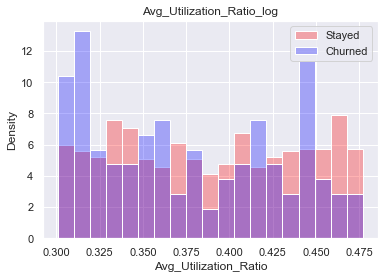

In [54]:
df_0 = df.loc[df['Attrition_Flag_num'] == 0,col] 
df_1 = df.loc[df['Attrition_Flag_num'] == 1,col]


min_ = df['Avg_Utilization_Ratio_log'].min()
max_ = df['Avg_Utilization_Ratio_log'].max()

sns.histplot(df_0,stat='density',bins=np.linspace(min_,max_,20),color='red',alpha=0.3,label='Stayed')
sns.histplot(df_1,stat='density',bins=np.linspace(min_,max_,20),color='blue',alpha=0.3,label='Churned')

plt.title('Avg_Utilization_Ratio_log')
plt.legend()
plt.show()

In [60]:
df.dtypes

Attrition_Flag                object
Customer_Age                   int64
Gender                        object
Dependent_count                int64
Education_Level               object
Marital_Status                object
Income_Category               object
Card_Category                 object
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
Attrition_Flag_num             int64
Avg_Utilization_Ratio_log    float64
dtype: object

In [61]:
df.select_dtypes(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [62]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print('|-->',df[col].unique())

Attrition_Flag
|--> ['Existing Customer' 'Attrited Customer']
Gender
|--> ['M' 'F']
Education_Level
|--> ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status
|--> ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category
|--> ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category
|--> ['Blue' 'Gold' 'Silver' 'Platinum']


In [63]:
df['Income_Category_num'] = df['Income_Category'].map({'$60K - $80K':70000, 'Less than $40K':40000, '$80K - $120K':100000, '$40K - $60K':50000, '$120K +':120000, 'Unknown':np.nan})
df['Gender_num'] = df['Gender'].map({'M':0, 'F':1})
df['Education_Level_num'] = df['Education_Level'].map({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5, 'Unknown':np.nan})
df['Has_Been_Married'] = df['Marital_Status'].map({'Married':1, 'Single':0, 'Unknown':np.nan, 'Divorced':1})
df['Card_Category_num'] = df['Card_Category'].map({'Blue':0, 'Gold':2, 'Silver':1, 'Platinum':3})

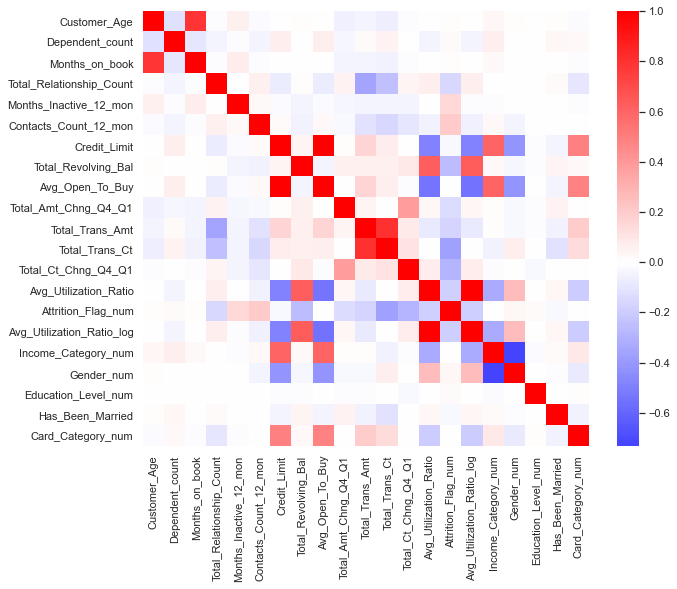

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='bwr', center=0)
plt.show()

In [65]:
df.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_num,Avg_Utilization_Ratio_log,Income_Category_num,Gender_num,Education_Level_num,Has_Been_Married,Card_Category_num
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018203,0.007295,0.032309,0.017312,0.001537,0.018237,-0.018235
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.018991,-0.037191,0.067931,-0.004563,0.005170,0.033336,0.030469
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013687,-0.007110,0.025632,0.006728,0.006069,0.011614,-0.012535
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.150005,0.067884,-0.003015,-0.003157,-0.002538,0.020820,-0.094077
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.152449,-0.009709,-0.009441,0.011163,-0.003122,-0.008374,-0.014629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Income_Category_num,0.032309,0.067931,0.025632,-0.003015,-0.009441,0.028841,0.605823,0.030466,0.602941,0.015123,0.015762,-0.050693,-0.012542,-0.330959,-0.006647,-0.331142,1.000000,-0.732932,-0.017059,0.024282,0.086525
Gender_num,0.017312,-0.004563,0.006728,-0.003157,0.011163,-0.039987,-0.420806,-0.029658,-0.418059,-0.026712,-0.024890,0.067454,0.005800,0.257851,0.037272,0.256140,-0.732932,1.000000,0.011401,-0.013847,-0.080093
Education_Level_num,0.001537,0.005170,0.006069,-0.002538,-0.003122,-0.008147,-0.009218,-0.010742,-0.008249,-0.011956,-0.008759,-0.007916,-0.022937,-0.000434,0.020725,-0.000690,-0.017059,0.011401,1.000000,0.007511,0.018152
Has_Been_Married,0.018237,0.033336,0.011614,0.020820,-0.008374,-0.006211,-0.040736,0.040779,-0.044407,0.048991,-0.053986,-0.111483,0.009482,0.037134,-0.022502,0.038225,0.024282,-0.013847,0.007511,1.000000,-0.049391


In [67]:
df.corr()[['Attrition_Flag_num']]

,Attrition_Flag_num
Customer_Age,0.018203
Dependent_count,0.018991
Months_on_book,0.013687
Total_Relationship_Count,-0.150005
Months_Inactive_12_mon,0.152449
...,...
Income_Category_num,-0.006647
Gender_num,0.037272
Education_Level_num,0.020725
Has_Been_Married,-0.022502


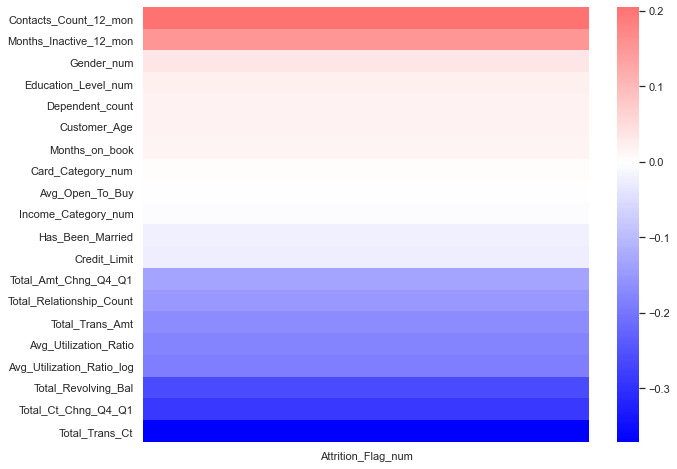

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().sort_values('Attrition_Flag_num',ascending=False).loc['Contacts_Count_12_mon':,'Attrition_Flag_num'].to_frame(), cmap='bwr', center=0)
plt.show()